In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams["figure.figsize"] = 15,5

# 1. Lectura de datos

In [ ]:
loan_data = pd.read_csv('../Data/credit_train.csv')
#https://www.kaggle.com/zaurbegiev/my-dataset/kernels

Ver los primeros 5 registros

In [ ]:
loan_data.head()

Dimensión de la data

In [ ]:
loan_data.shape

Listado de columnas y su formato

In [ ]:
loan_data.info()

Descripción de las columnas numéricas

In [ ]:
loan_data.describe()

Credit Score debe tener valores entre 350 a 850
https://www.nerdwallet.com/blog/finance/highest-credit-score/

# 2. Visualización de datos

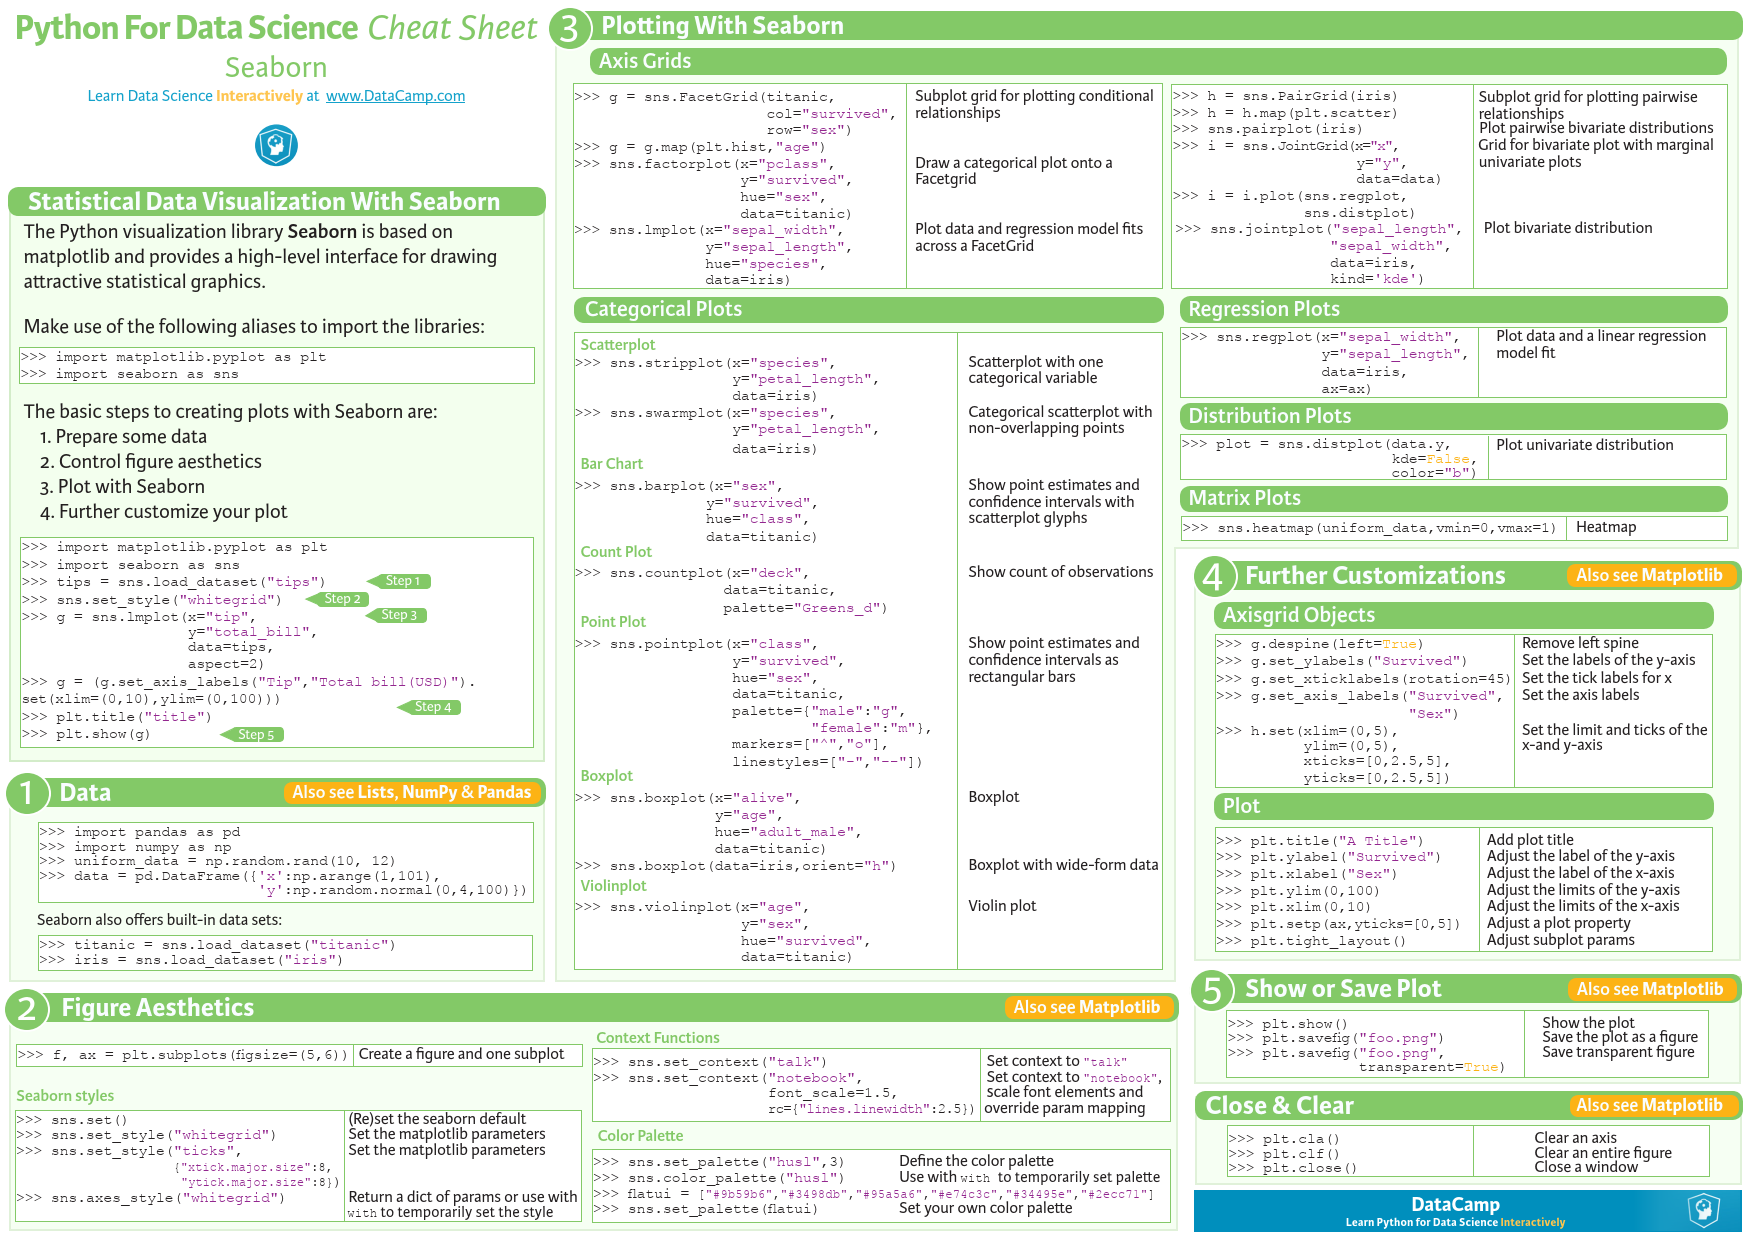

Visualización por tipo de datos

https://www.data-to-viz.com/

## 2.1 Visualización univariada

El análisis univariado analiza una característica a la vez. Cuando analizamos una variable de forma independiente, generalmente nos interesa la distribución de sus valores e ignoramos otras características en el conjunto de datos.

### 2.1.1 Variables cuantitativas

Las variables cuantitativas toman valores numéricos ordenados. Esos valores pueden ser discretos (números enteros) o continuos (números reales) y generalmente expresan un conteo o una medición.

Para observar la distribución de una variable se usa el histograma.

In [ ]:
columnas = ['Number of Credit Problems', 'Number of Open Accounts']
loan_data[columnas].hist();

###### Gráficos Kernel Density Plots

In [ ]:
loan_data[columnas].plot(kind='density', subplots=True, layout=(1, 2), sharex=False);

In [ ]:
sns.histplot(loan_data['Number of Open Accounts'],kde=True)

###### Diagrama de cajas

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Number of Open Accounts', data=loan_data);

La longitud de la caja está determinada por el percentil 25 (Q1) y 75 (Q3). La línea vertical dentro de la caja marca la mediana (Q2). Las líneas muestran el rango intercuantil y lo puntos fuera de este rango son los valores atípicos.

###### Violin plot

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
sns.boxplot(data=loan_data['Years of Credit History'], ax=axes[0]);
sns.violinplot(data=loan_data['Years of Credit History'], ax=axes[1]);

### 2.1.1 Variables categóricas

Son variables que contienen valores fijos conocido como categorías que refleja una propiedad cualitativa. Si los valores de una variable categórica están ordenados, se llama ordinal.

###### Frecuencia

In [ ]:
loan_data['Home Ownership'].value_counts()

###### Bar plot

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.countplot(x='Loan Status', data=loan_data, ax=axes[0]);
sns.countplot(x='Home Ownership', data=loan_data, ax=axes[1], palette='deep');

In [ ]:
loan_data['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))

## 3.1 Visualización multivariada

### 3.1.1 Variables cuantitativas vs cuantitativas

###### Matriz de correlación

La correlación entre dos variables mide el grado de ajuste de la nube de puntos a la función matemática asignada. La relación entre dos variables puede ajustarse muy bien a una recta o cualquier otra función matemática. Para medir el grado de ajuste de la distribución a una recta, se emplea el coeficiente de correlación de Pearson, r. Un coeficiente positivo y alto indica que ambas variables crecen o decrecen simultáneamente, es decir, presentan una fuerte correlación. Cuando mayor sea el coeficiente, más estrecho es la relación entre las variables. Un coeficiente alto y negativo indica que cuando una variable crece, la otra decrece y viceversa, es decir, presentan una fuerte correlación inversa. Si el coeficiente es cero o próxima a cero indica que no existe relación entre las variables.

In [ ]:
columna = ['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History','Months since last delinquent','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']

In [ ]:
matriz_correlacion = loan_data[columna].corr()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(matriz_correlacion);

Las variables Bankruptcies y Number of Credit Problems son las que mayor correlación poseen.

###### Scatter plot

Relación entre la variables 'x' y 'y'.

In [ ]:
sns.scatterplot(x="Bankruptcies", y="Number of Credit Problems", data=loan_data)

In [ ]:
sns.scatterplot(x="Months since last delinquent", y="Current Credit Balance", data=loan_data)

###### jointplot

Muestra la relación entre dos variables y la distribución de cada una de ellas.

In [ ]:
sns.jointplot(x='Months since last delinquent', y='Current Credit Balance', data=loan_data, kind='scatter');

###### Scatterplot matrix

In [ ]:
sns.pairplot(loan_data[['Current Loan Amount','Credit Score','Annual Income','Monthly Debt','Years of Credit History']].dropna())

### 3.1.2 Variables cuantitativas vs categóricas

In [ ]:
sns.lmplot('Annual Income', 'Years of Credit History', data=loan_data[loan_data['Annual Income']<10000000], hue='Loan Status', fit_reg=False);

###### Boxplot

In [ ]:
sns.boxplot(x="Loan Status", y='Number of Open Accounts', data=loan_data)

In [ ]:
sns.boxplot(x="Home Ownership", y='Years of Credit History', data=loan_data)

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Loan Status', y='Credit Score', data=loan_data[loan_data['Credit Score']<850], ax=axes[0]);
sns.violinplot(x='Loan Status', y='Credit Score', data=loan_data[loan_data['Credit Score']<850], ax=axes[1]);

###### catplot

In [ ]:
sns.catplot(x='Loan Status', y='Credit Score', col='Years in current job',
               data=loan_data[loan_data['Credit Score']<850], kind="box",
               col_wrap=4, height=3, aspect=.8)

### 3.1.2 Variables categóricas vs categóricas

###### countplot

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Home Ownership', hue='Loan Status', data=loan_data)

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Years in current job', hue='Loan Status', data=loan_data)

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Term', hue='Loan Status', data=loan_data)